In [1]:
#import libraries

import pandas as pd
from pathlib import Path

import hvplot.pandas
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout




In [2]:
file = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file, index_col='Unnamed: 0')

y = df['price'].values
X = df.drop(columns = 'price')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=7)

# Build the Deep neural network

In [33]:
model = Sequential()

# Add the first layer where the input dimensions are the 6 columns of the training data
number_inputs = 26
number_hidden_nodes = 26*3

model.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))
model.add(Dropout(0.2))

# #second layer
# hidden_layer_2 = 5
# model.add(Dense(units=hidden_layer_2, activation="relu", input_dim=number_inputs))
# model.add(Dropout(0.4))

#number of outputs 2:  0 or 1
number_outputs = 1

# Add output layer using binary output nodes. 
model.add(Dense(units=number_outputs, activation="linear"))

# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 78)                2106      
_________________________________________________________________
dropout_4 (Dropout)          (None, 78)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 79        
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Use the training data to fit (train) the model
# @NOTE: Experiment with the number of training epochs to find the minimum iterations required to achieve a good accuracy
model_nn = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size = 32)

Epoch 1/100
791/791 [==============================] - 1s 854us/step - loss: 30180182.0000 - mean_absolute_error: 3855.0542 - val_loss: 28665536.0000 - val_mean_absolute_error: 3749.1064
Epoch 2/100
791/791 [==============================] - 1s 748us/step - loss: 23760596.0000 - mean_absolute_error: 3413.6252 - val_loss: 19725394.0000 - val_mean_absolute_error: 3102.8728
Epoch 3/100
791/791 [==============================] - 1s 751us/step - loss: 15108203.0000 - mean_absolute_error: 2683.5623 - val_loss: 11614976.0000 - val_mean_absolute_error: 2334.9326
Epoch 4/100
791/791 [==============================] - 1s 781us/step - loss: 8901974.0000 - mean_absolute_error: 2018.5244 - val_loss: 6808847.0000 - val_mean_absolute_error: 1787.2719
Epoch 5/100
791/791 [==============================] - 1s 778us/step - loss: 5642712.5000 - mean_absolute_error: 1624.0188 - val_loss: 4471408.5000 - val_mean_absolute_error: 1480.4198
Epoch 6/100
791/791 [==============================] - 1s 761us/step 

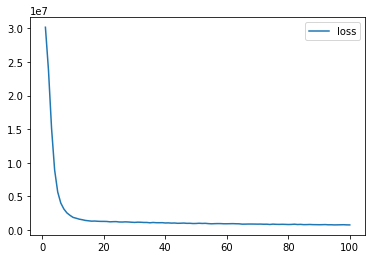

In [35]:
# Create a DataFrame with the history dictionary

df_results = pd.DataFrame(model_nn.history, index=range(1, len(model_nn.history["loss"]) + 1))

# Plot the loss

df_results.plot(y="loss")

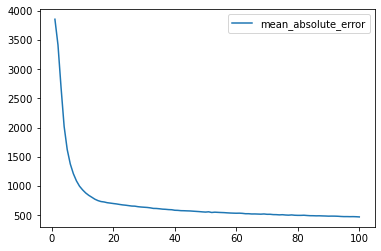

In [36]:
# Plot the mean absolute error
df_results.plot(y="mean_absolute_error")

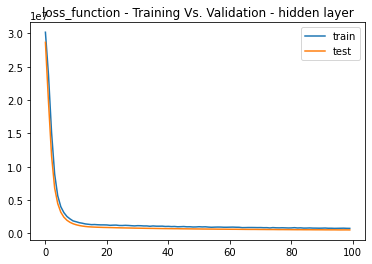

In [37]:
# Train vs test for shallow net
plt.plot(model_nn.history["loss"])
plt.plot(model_nn.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - hidden layer")
plt.legend(["train", "test"])
plt.show()

In [38]:
# Make predictions
predicted = model.predict(X_test)

predicted.reshape(1,-1)[0]

array([ 963.22485, 3922.9387 , 3250.8943 , ..., 3849.0767 , 5033.609  ,
       7374.163  ], dtype=float32)

In [39]:
results_df = pd.DataFrame({'y_test' : y_test, 
                         'y_pred': predicted.reshape(1,-1)[0] })

results_df.hvplot.table()

:Table   [y_test,y_pred]

In [40]:
results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3892.519775
std,3974.906564,3888.591309
min,327.000000,50.643864
25%,942.000000,906.313232
50%,2389.000000,2315.532715
75%,5392.000000,5545.386230
max,18806.000000,27238.076172


In [41]:
print(f'Total price of all diamonds in the test sample is', format(results_df.sum()[0],',.0f') )
print(f'Total predicted price of all diamonds is', format(results_df.sum()[1],',.0f'))

Total_delta = (results_df.sum()[1] - results_df.sum()[0] ) #/ 
print(f'Total delta is $', format(Total_delta, ',.0f'))
print('Delta as % of total price is', format(Total_delta/results_df.sum()[0] , ',.2%') )

Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 69,290,673
Total delta is $ -664,163
Delta as % of total price is -0.95%


In [42]:
# # Delta is -0.82%
# number_inputs = 26
# number_hidden_nodes = 26*3

# model.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))
# model.add(Dropout(0.2))


# #number of outputs 2:  0 or 1
# number_outputs = 1

# # Add output layer using binary output nodes. 
# model.add(Dense(units=number_outputs, activation="linear"))

# # Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# # and add accuracy to the training metrics
# model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# # Print the model summary
# model.summary()

# batch =32, epochs=100